In [2]:
#Loading libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datasets import load_dataset

import ast

#Loading data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

#Clean data
df.job_posted_date = pd.to_datetime(df.job_posted_date)
df.job_skills=df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

Extracting data files:   0%|          | 0/1 [00:00<?, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

Dataset csv downloaded and prepared to C:/Users/ADMIN/.cache/huggingface/datasets/lukebarousse___csv/lukebarousse--data_jobs-8492436fa5796c3e/0.0.0/6954658bab30a358235fa864b05cf819af0e179325c740e4bc853bcc7ec513e1. Subsequent calls will reuse this data.


  0%|          | 0/1 [00:00<?, ?it/s]

**1. Skill trend for Data Analyst in Vietnam**

In [3]:
df_VN_DA=df[(df['job_country']=="Vietnam")&(df['job_title_short']=='Data Analyst')].copy()
df_VN_DA['job_month']=df_VN_DA.job_posted_date.dt.month
df_VN_DA_exploded=df_VN_DA.explode('job_skills')
df_VN_DA_pivot=df_VN_DA_exploded.pivot_table(df_VN_DA_exploded,
                        columns='job_skills',
                        index='job_month',
                        aggfunc='size',
                        fill_value=0
                        )
df_VN_DA_pivot.loc['total']=df_VN_DA_pivot.sum()
df_VN_DA_pivot=df_VN_DA_pivot[df_VN_DA_pivot.loc['total'].sort_values(ascending = False).index].drop('total')



In [4]:

total_posting = df_VN_DA.groupby('job_month').size()
df_VN_DA_pct = df_VN_DA_pivot.div(total_posting / 100, axis=0)
df_VN_DA_pct = df_VN_DA_pct.reset_index()
df_VN_DA_pct['job_month'] = df_VN_DA_pct['job_month'].apply(lambda x: pd.to_datetime(str(x), format='%m').strftime('%b'))
df_VN_DA_pct = df_VN_DA_pct.set_index('job_month')

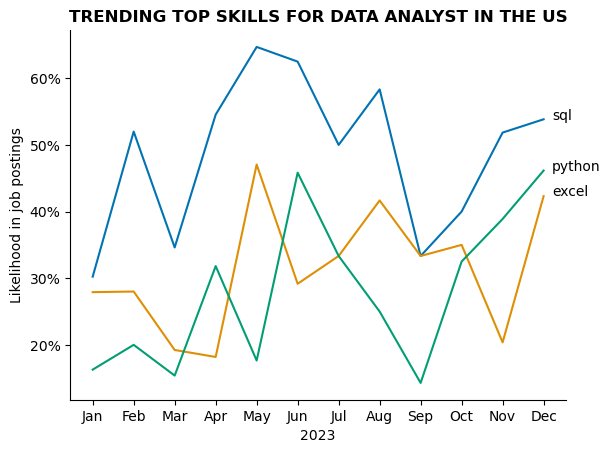

In [5]:
df_VN_DA_plot=df_VN_DA_pct.iloc[:, :3]
sns.lineplot(data=df_VN_DA_plot, dashes=False, palette = 'colorblind' )
plt.xlabel('2023')
plt.ylabel('Likelihood in job postings')
plt.title('TRENDING TOP SKILLS FOR DATA ANALYST IN THE US',fontweight = 'bold')
plt.legend().remove()
sns.despine()

from matplotlib.ticker import PercentFormatter
ax=plt.gca()
ax.yaxis.set_major_formatter(PercentFormatter(decimals=0))

for i in range(3):
    plt.text(11.2, df_VN_DA_plot.iloc[-1,i], df_VN_DA_plot.columns[i])